<h1 class="alert alert-block alert-info" style="text-align:center; font-size:30px">Sentiment Analysis for Twitter Data</h1>


<h1 class="alert alert-block alert-info" style="text-align:center; font-size:30px">About Data Set</h1>
<li>Data is collected from tweets about Pfizer and BioNTech vaccine.



<h1 class="alert alert-block alert-info" style="text-align:center; font-size:30px">Importing Libraries</h1>

In [ ]:
import pandas as pd
import numpy as np

#For find pattern in text
import re

#For visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

import nltk
nltk.download('stopwords')
nltk.download('punkt')

#For processing textial data
from textblob import TextBlob

#For Tokenizing segments
from nltk.tokenize import word_tokenize

#For Stemming text
from nltk.stem import PorterStemmer

#For removing StopWords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

#For sorting purpose
from collections import defaultdict

# Convert a collection of text documents to a matrix of token counts.
from sklearn.feature_extraction.text import CountVectorizer

#To split data into train and test
from sklearn.model_selection import train_test_split

#For fitting model
from sklearn.linear_model import LogisticRegression

#For evaluation of model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


**Importing Data**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
url = 'https://drive.google.com/uc?id={}'.format("1ZTCjjl_ZEV53jw-e4wVDuEuvD4BaLkv2")
df = pd.read_csv(url)

#https://drive.google.com/file/d/1ZTCjjl_ZEV53jw-e4wVDuEuvD4BaLkv2/view?usp=sharing

<h1 class="alert alert-block alert-info" style="text-align:center; font-size:30px">Data Exploration</h1>

In [ ]:
df.head(4)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                11020 non-null  int64 
 1   user_name         11020 non-null  object
 2   user_location     8750 non-null   object
 3   user_description  10341 non-null  object
 4   user_created      11020 non-null  object
 5   user_followers    11020 non-null  int64 
 6   user_friends      11020 non-null  int64 
 7   user_favourites   11020 non-null  int64 
 8   user_verified     11020 non-null  bool  
 9   date              11020 non-null  object
 10  text              11020 non-null  object
 11  hashtags          8438 non-null   object
 12  source            11019 non-null  object
 13  retweets          11020 non-null  int64 
 14  favorites         11020 non-null  int64 
 15  is_retweet        11020 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 1.2+ MB


In [ ]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [ ]:
# Extracting only Text attributes for analysis
text_df = df.drop(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],axis=1)
text_df.head()

,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...


In [ ]:
#visualizing Raw data we have from Tweetr
print(text_df["text"].iloc[0],"\n")
print(text_df["text"].iloc[1],"\n")
print(text_df["text"].iloc[2],"\n")
print(text_df["text"].iloc[3],"\n")
print(text_df["text"].iloc[4],"\n")

folks said daikon paste could treat cytokine storm pfizerbiontech 

world wrong side history year hopefully biggest vaccination effort weve ev 

coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_19 russian vaccine created last 24 years 

facts immutable senator even youre ethically sturdy enough acknowledge 1 born 

explain need vaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech 




<h1 class="alert alert-block alert-info" style="text-align:center; font-size:30px">Data Preprocessing</h1>

In [ ]:
def data_processing(text):
    text = text.lower()     #Converting to text to lowercase
    text = re.sub(r'https\S+|www\S+https\S+','',text,flags=re.MULTILINE)   #Removing URL
    text = re.sub(r'\@w+|\#','',text)         #Removing hashtags
    text = re.sub(r'[^\w\s]','',text)         #Removing hashtags
    text_tokens = word_tokenize(text)         #Getting tokens
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [ ]:
# Applying Data Processing function
text_df.text = text_df["text"].apply(data_processing)

In [ ]:
# Removing Duplicates if any
text_df = text_df.drop_duplicates('text')

In [ ]:
# Performing Stemming
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [ ]:
text_df["text"] = text_df["text"].apply(lambda x: stemming(x))

In [ ]:
text_df.head(5)

,text
0,folks said daikon paste could treat cytokine s...
1,world wrong side history year hopefully bigges...
2,coronavirus sputnikv astrazeneca pfizerbiontec...
3,facts immutable senator even youre ethically s...
4,explain need vaccine borisjohnson matthancock ...


In [ ]:
#Checking data shape
print("Shape of dataframe:", text_df.shape)

Shape of dataframe: (10543, 1)


In [ ]:
#calculating polarity for categorizing text
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
text_df["polarity"] = text_df["text"].apply(polarity)
text_df.head(10)

,text,polarity
0,folks said daikon paste could treat cytokine s...,0.000
1,world wrong side history year hopefully bigges...,-0.500
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.000
3,facts immutable senator even youre ethically s...,0.100
4,explain need vaccine borisjohnson matthancock ...,0.000
5,anyone useful adviceguidance whether covid vac...,0.400
6,bit sad claim fame success vaccination patriot...,-0.100
7,many bright days 2020 best 1 bidenharris winni...,0.675
8,covid vaccine getting covidvaccine covid19 pfi...,0.000
9,covidvaccine states start getting covid19vacci...,0.000


In [ ]:
#  Adding Sentiment to the data frame
def sentiment(label):
    if label < 0:
        return "Negative"
    elif label == 0:
        return "Neutral"
    elif label > 0:
        return "Positive"

In [ ]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)
text_df.head(10)

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine s...,0.000,Neutral
1,world wrong side history year hopefully bigges...,-0.500,Negative
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.000,Neutral
3,facts immutable senator even youre ethically s...,0.100,Positive
4,explain need vaccine borisjohnson matthancock ...,0.000,Neutral
5,anyone useful adviceguidance whether covid vac...,0.400,Positive
6,bit sad claim fame success vaccination patriot...,-0.100,Negative
7,many bright days 2020 best 1 bidenharris winni...,0.675,Positive
8,covid vaccine getting covidvaccine covid19 pfi...,0.000,Neutral
9,covidvaccine states start getting covid19vacci...,0.000,Neutral


<Axes: xlabel='sentiment', ylabel='count'>

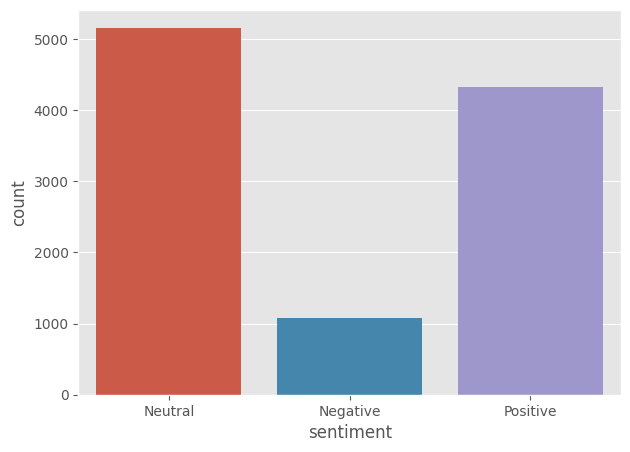

In [ ]:
#Visualizing the Sentiment
fig = plt.figure(figsize=(7,5))
sns.countplot(x="sentiment",data=text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

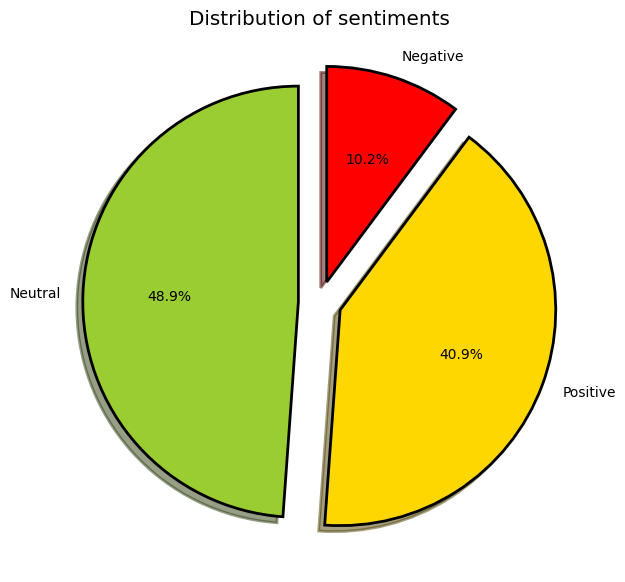

In [ ]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [ ]:
#positive sentiments
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,text,polarity,sentiment
9317,best way get merrygoround pfizer pfizerbiontec...,1.0,Positive
2340,applying emotion pfizerbiontech based best evi...,1.0,Positive
6295,pfizer jab morning efficient wellorganised tha...,1.0,Positive
5041,get art printed awesome products support redbu...,1.0,Positive
1055,already vaccinated getting vaccine soon plan t...,1.0,Positive


In [ ]:
#storing each word with their frequency to a dictionary
word_frequency = defaultdict(int)

for tweet in pos_tweets['text']:
    words = tweet.split()  # Split the tweet into words
    for word in words:
        word_frequency[word] += 1

word_frequency_dict = dict(word_frequency)
print(word_frequency_dict)

{'best': 64, 'way': 45, 'get': 279, 'merrygoround': 1, 'pfizer': 577, 'pfizerbiontech': 2323, 'pfizerstock': 1, 'applying': 2, 'emotion': 1, 'based': 17, 'evidence': 12, 'support': 14, 'extending': 2, 'time': 73, 'jab': 159, 'morning': 68, 'efficient': 19, 'wellorganised': 1, 'thank': 160, 'wonderful': 22, 'doctor': 6, 'gav': 3, 'art': 3, 'printed': 1, 'awesome': 5, 'products': 5, 'redbubble': 1, 'rbandme': 1, 'findyourthing': 1, 'already': 21, 'vaccinated': 268, 'getting': 105, 'vaccine': 1825, 'soon': 28, 'plan': 5, 'travel': 11, 'abroad': 1, 'dmc': 1, 'tripadvisor': 1, 'reviews': 1, 'club': 8, 'kent': 1, 'canterbury': 1, 'nhs': 71, 'covidvaccination': 47, 'drericding': 5, 'god': 11, 'news': 123, 'ive': 44, 'read': 36, 'week': 85, 'cant': 25, 'stop': 6, 'worrying': 4, 'niece': 1, 'nephew': 1, 'think': 29, 'got': 397, 'todayy': 1, 'hooray': 1, 'gods': 3, 'timing': 2, 'always': 15, 'perfect': 6, 'updated': 5, 'upgraded': 1, 'today': 417, 'dadcase': 1, 'enriched': 1, 'enhanced': 1, 'bio

In [ ]:
file_path = "/content/my_dict.txt"

with open(file_path, 'w') as file:
    for key, value in word_frequency_dict.items():
        file.write(f"{key}: {value}\n")

In [ ]:
#negative sentiments
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,text,polarity,sentiment
2912,work skilled nursing facility got first vaccin...,-0.003333,Negative
7256,200321 752308 vaccinations new daily record da...,-0.003409,Negative
2073,ukgovernment cant even vaccinate properly ethi...,-0.004762,Negative
7715,got first dose less waiting time airport vacci...,-0.005556,Negative
7157,nas_k27 second dose due end next month well fa...,-0.006250,Negative


In [ ]:
word_frequency1 = defaultdict(int)

for tweet1 in neg_tweets['text']:
    words1 = tweet1.split()  # Split the tweet into words
    for word1 in words1:
        word_frequency1[word1] += 1

word_frequency_dict1 = dict(word_frequency1)
print(word_frequency_dict1)

{'work': 20, 'skilled': 1, 'nursing': 4, 'facility': 2, 'got': 56, 'first': 42, 'vaccine': 370, 'far': 13, 'less': 28, 'painful': 3, 'flu': 13, 'vaccin': 10, '200321': 1, '752308': 1, 'vaccinations': 10, 'new': 20, 'daily': 6, 'record': 1, 'vaccination': 60, 'numbers': 7, 'rolling': 3, '7': 3, 'day': 44, 'average': 5, 'ukgovernment': 1, 'cant': 10, 'even': 16, 'vaccinate': 8, 'properly': 2, 'ethically': 1, 'get': 56, 'right': 6, 'kinds': 1, 'wrong': 11, 'dose': 121, 'waiting': 9, 'time': 28, 'airport': 2, 'center': 11, 'pain': 17, 'side': 41, 'effects': 33, 'nas_k27': 1, 'second': 56, 'due': 39, 'end': 10, 'next': 12, 'month': 3, 'well': 26, 'pfizerbiontech': 490, '2015': 1, 'worried': 4, 'absence': 1, 'mrna': 17, 'challenge': 2, 'warning': 1, 'global': 4, 'pandemic': 6, 'outbreak': 1, 'may': 16, 'change': 7, 'game': 10, 'person': 5, 'multiple': 3, 'sclerosis': 1, 'im': 41, 'beyond': 3, 'excited': 4, 'future': 1, 'trishgreenhalgh': 1, 'unfortunate': 1, 'sod': 1, 'tested': 4, 'positive'

In [ ]:
file_path1 = "/content/my_dict1.txt"

with open(file_path1, 'w') as file:
    for key, value in word_frequency_dict1.items():
        file.write(f"{key}: {value}\n")


In [ ]:
#neutral sentiment
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine s...,0.0,Neutral
7347,anyone else feel like framing vaccine card pfi...,0.0,Neutral
7458,looking forward getting second pfizer shot any...,0.0,Neutral
7454,never thought id running diff vaccine modernav...,0.0,Neutral
7453,john___m dont get choose one person know asked...,0.0,Neutral


In [ ]:
word_frequency2 = defaultdict(int)

for tweet2 in neutral_tweets['text']:
    words2 = tweet2.split()  # Split the tweet into words
    for word2 in words2:
        word_frequency2[word2] += 1

word_frequency_dict2 = dict(word_frequency2)
print(word_frequency_dict2)

{'folks': 6, 'said': 84, 'daikon': 1, 'paste': 1, 'could': 42, 'treat': 5, 'cytokine': 1, 'storm': 2, 'pfizerbiontech': 3244, 'anyone': 39, 'else': 9, 'feel': 36, 'like': 83, 'framing': 1, 'vaccine': 1945, 'card': 7, 'pfizervaccine': 266, 'betterthanchristmas': 1, 'looking': 20, 'forward': 17, 'getting': 90, 'second': 286, 'pfizer': 787, 'shot': 203, 'got': 331, 'vaccinated': 412, 'never': 14, 'thought': 10, 'id': 7, 'running': 3, 'diff': 1, 'modernavaccine': 39, 'john___m': 1, 'dont': 58, 'get': 223, 'choose': 10, 'one': 175, 'person': 16, 'know': 85, 'asked': 17, 'preference': 3, 'go': 67, 'choice': 12, 'fe': 2, 'start': 41, 'testing': 10, 'freezedried': 1, 'version': 2, 'covid19': 1224, 'april': 9, 'received': 124, 'vaccination': 277, 'afternoon': 14, 'taking': 32, 'pinot': 1, 'grigio': 1, 'precaution': 2, 'covidvaccine': 381, 'bring': 8, 'twins': 2, 'baseball': 1, 'im': 107, 'fully': 135, 'today': 325, 'targetfield': 1, 'messages': 2, 'teens': 5, 'middle': 2, 'day': 80, 'instructiv

In [ ]:
file_path2 = "/content/my_dict2.txt"

with open(file_path2, 'w') as file:
    for key, value in word_frequency_dict2.items():
        file.write(f"{key}: {value}\n")

In [ ]:
# Function to perform quick sort
def quick_sort_descending(data_dict):
    if len(data_dict) <= 1:
        return data_dict

    pivot_key = next(iter(data_dict))
    pivot_value = data_dict[pivot_key]

    less = {key: value for key, value in data_dict.items() if value > pivot_value}
    equal = {key: value for key, value in data_dict.items() if value == pivot_value}
    greater = {key: value for key, value in data_dict.items() if value < pivot_value}

    return {**quick_sort_descending(less), **equal, **quick_sort_descending(greater)}

# Sort the data using quick sort
sorted_data_descending_positive = quick_sort_descending(word_frequency_dict)
sorted_data_descending_negative = quick_sort_descending(word_frequency_dict1)
sorted_data_descending_neutral = quick_sort_descending(word_frequency_dict2)
# Print the sorted data
print(sorted_data_descending_positive)
print(sorted_data_descending_negative)
print(sorted_data_descending_neutral)

{'pfizerbiontech': 2323, 'vaccine': 1825, 'first': 1119, 'covid19': 920, 'dose': 770, 'pfizer': 577, 'today': 417, 'got': 397, 'covid': 316, 'vaccines': 296, 'get': 279, 'new': 275, 'vaccinated': 268, 'covidvaccine': 256, 'vaccination': 254, 'received': 235, 'effective': 231, 'thanks': 227, 'second': 211, 'amp': 203, 'good': 189, 'shot': 185, 'people': 172, 'one': 169, 'great': 166, 'thank': 160, 'jab': 159, 'day': 157, 'pfizervaccine': 156, 'coronavirus': 151, 'done': 149, 'us': 147, 'moderna': 144, 'doses': 143, '2nd': 143, 'im': 142, 'full': 138, '2': 137, 'covid19vaccine': 130, 'happy': 126, 'news': 123, 'astrazeneca': 122, 'many': 119, 'grateful': 112, '1st': 108, 'side': 108, 'feeling': 107, 'approval': 107, 'getting': 105, 'fda': 105, 'study': 103, 'safe': 103, '1': 99, 'data': 98, 'uk': 92, 'far': 92, 'effects': 87, 'receive': 86, 'week': 85, 'arm': 80, 'health': 79, 'available': 79, 'feel': 77, 'mrna': 76, 'well': 74, 'time': 73, 'staff': 73, 'world': 73, 'biontech': 72, 'nhs'

In [ ]:
# Define data: taking first 10 for each sentiment
positive_sentiments = list(sorted_data_descending_positive.keys())[:10]
positive_frequencies = list(sorted_data_descending_positive.values())[:10]

negative_sentiments = list(sorted_data_descending_negative.keys())[:10]
negative_frequencies = list(sorted_data_descending_negative.values())[:10]

neutral_sentiments = list(sorted_data_descending_neutral.keys())[:10]
neutral_frequencies = list(sorted_data_descending_neutral.values())[:10]

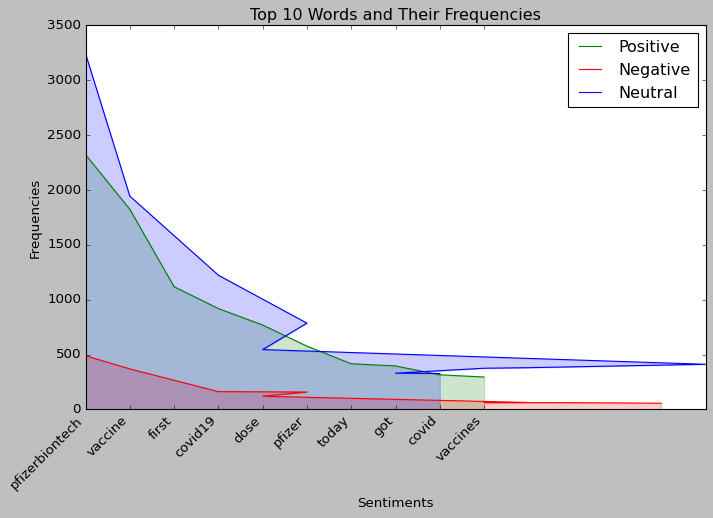

In [ ]:
# Create bar plot
plt.figure(figsize=(10, 6))

# Create positive sentiment plot
plt.plot(positive_sentiments, positive_frequencies, color='green', label='Positive')
plt.fill_between(positive_sentiments, 0, positive_frequencies, color='green', alpha=0.2)

# Create negative sentiment plot
plt.plot(negative_sentiments, negative_frequencies, color='red', label='Negative')
plt.fill_between(negative_sentiments, 0, negative_frequencies, color='red', alpha=0.2)

# Create neutral sentiment plot
plt.plot(neutral_sentiments, neutral_frequencies, color='blue', label='Neutral')
plt.fill_between(neutral_sentiments, 0, neutral_frequencies, color='blue', alpha=0.2)

plt.xlabel('Sentiments')
plt.ylabel('Frequencies')
plt.title('Top 10 Words and Their Frequencies')

plt.xticks(range(len(positive_sentiments)), positive_sentiments, rotation=45, ha='right')

plt.legend()
plt.show()

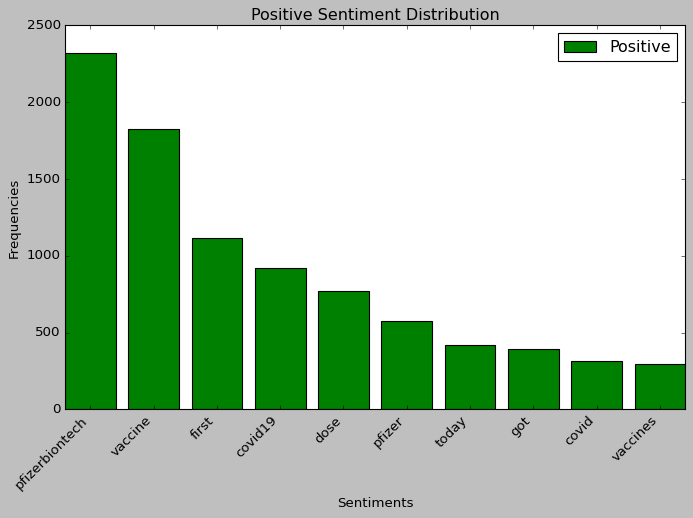

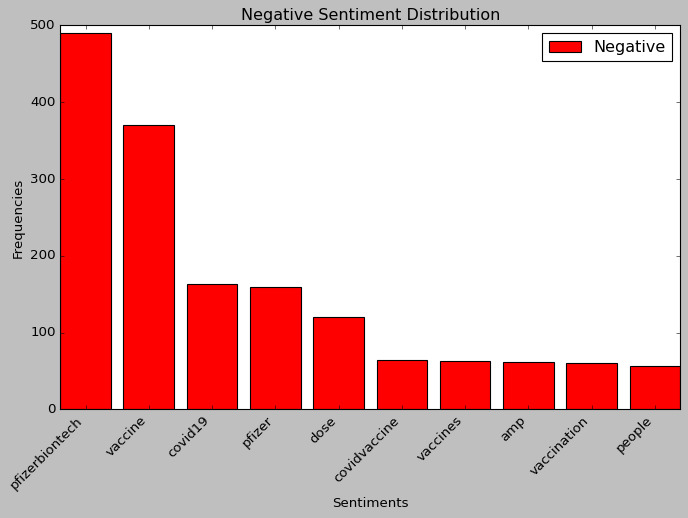

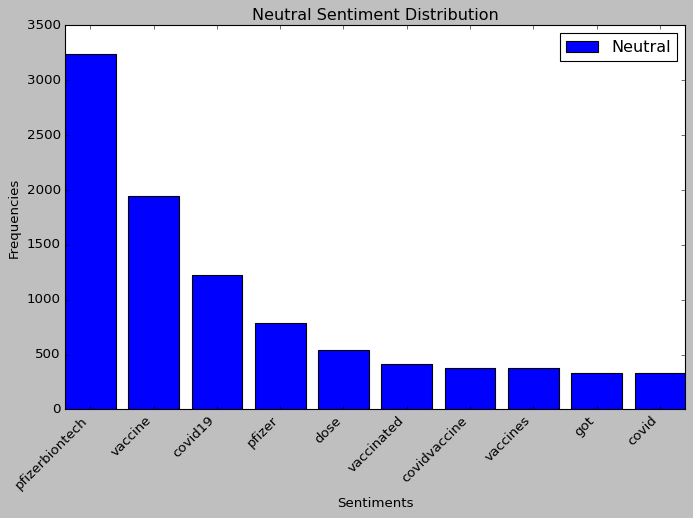

In [ ]:
# Create bar plot for positive sentiment
plt.figure(figsize=(10, 6))
plt.bar(positive_sentiments, positive_frequencies, label='Positive', color='green')
plt.xlabel('Sentiments')
plt.ylabel('Frequencies')
plt.title('Positive Sentiment Distribution')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

# Create bar plot for negative sentiment
plt.figure(figsize=(10, 6))
plt.bar(negative_sentiments, negative_frequencies, label='Negative', color='red')
plt.xlabel('Sentiments')
plt.ylabel('Frequencies')
plt.title('Negative Sentiment Distribution')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

# Create bar plot for neutral sentiment
plt.figure(figsize=(10, 6))
plt.bar(neutral_sentiments, neutral_frequencies, label='Neutral', color='blue')
plt.xlabel('Sentiments')
plt.ylabel('Frequencies')
plt.title('Neutral Sentiment Distribution')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()


<h1 class="alert alert-block alert-info" style="text-align:center; font-size:30px">Vectorizing Data</h1>


In [ ]:
# Performing Vectorizing to create bigram model
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])

In [ ]:
#Getting Features
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 78583

First 20 features:
 ['000' '000 doses' '000 initial' '000 people' '000 vaccines' '0000001'
 '0000001 covid19' '0011' '0011 abt' '004' '004 covid' '004 israelis' '01'
 '01 getting' '01 june' '01 november' '01aug2021' '01aug2021 doublevaxxed'
 '02' '02 175']



<h1 class="alert alert-block alert-info" style="text-align:center; font-size:30px">Model Development</h1>

In [ ]:
#separating Independent and Depentent Variables and tranform X data
X = text_df['text']
Y = text_df['sentiment']
X = vect.transform(X)

In [ ]:
# Splitting data with test 20%
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
#Checking shape of train and test data
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (8434, 78583)
Size of y_train: (8434,)
Size of x_test: (2109, 78583)
Size of y_test: (2109,)


In [ ]:
import warnings
warnings.filterwarnings('ignore')

#Training logisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 84.64%


In [ ]:
#Confusion matrix
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[  72  116   38]
 [   4 1008    9]
 [   8  149  705]]


              precision    recall  f1-score   support

    Negative       0.86      0.32      0.46       226
     Neutral       0.79      0.99      0.88      1021
    Positive       0.94      0.82      0.87       862

    accuracy                           0.85      2109
   macro avg       0.86      0.71      0.74      2109
weighted avg       0.86      0.85      0.83      2109

